# 6 Анализ платежей и продуктов:
(Payments and Products Analysis)

### Загрузка модулей, функций и данных

In [2]:
# load modules and functions 
import os
import numpy as np
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from colorama import Fore, Back, Style
from datetime import time, timedelta

#import My_Function_050824_M_Filimonov as mvf # loading functions written by me for the Project from a file 

# load DataFrames:
deals = pd.read_pickle("04_deals.pkl")

## 6.1 Анализ распределения типов оплаты и их влияния на успешность сделок


Summary table of Success Deals Rate by Payment Type


,Payment_Type,Total_Deals,Successful_Deals,Success_Rate (%)
0,One Payment,141,113,80.14
1,Recurring Payments,350,250,71.43
2,Reservation,5,1,20.00


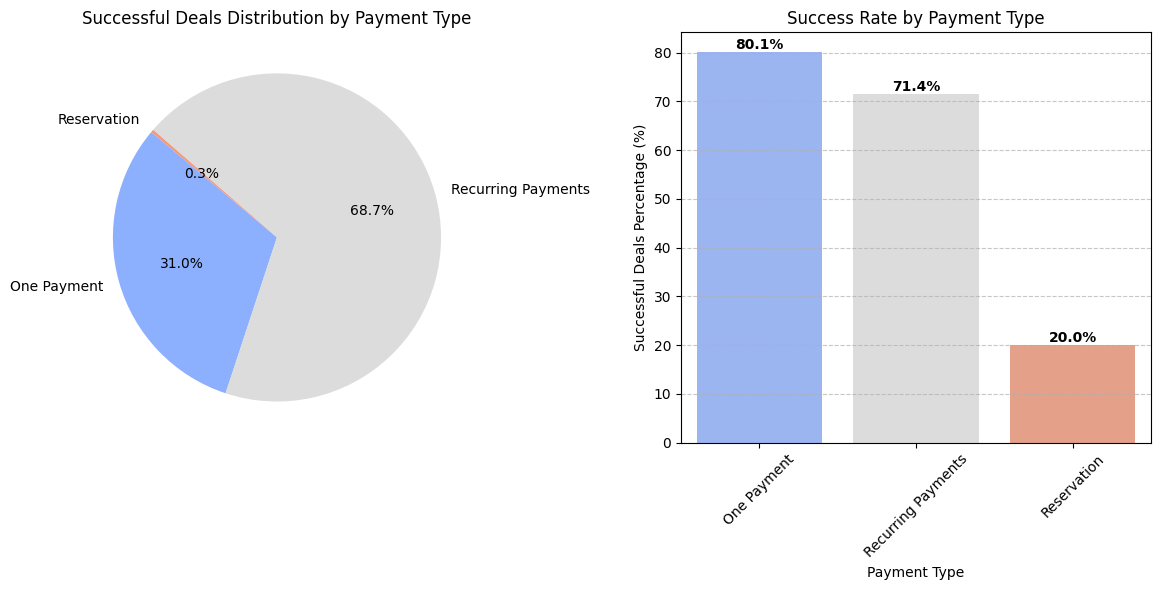

In [3]:
# Group data by payment type
payment_stats = deals.groupby("Payment_Type", observed=False).agg(
    Total_Deals=("Id", "count"), 
    Successful_Deals=("Stage", lambda x: (x == "Payment Done").sum())
).reset_index()

# Calculate the percentage of successful deals
payment_stats["Success_Rate (%)"] = (payment_stats["Successful_Deals"] / payment_stats["Total_Deals"]) * 100

# Filter out 'unknown' payment types
payment_stats = payment_stats[payment_stats["Payment_Type"] != "unknown"]

# Remove 'unknown' from category list
payment_stats["Payment_Type"] = payment_stats["Payment_Type"].cat.remove_categories("unknown")

# Set float display format
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option("display.max_rows", 20) 

print(Back.YELLOW + "\nSummary table of Success Deals Rate by Payment Type"  + Style.RESET_ALL)
display(payment_stats)

# Generate unique colors based on the number of categories
color_count = len(payment_stats["Payment_Type"].unique())
colors = sns.color_palette("coolwarm", color_count)  # Generate colors dynamically

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart: Successful deals distribution by payment type
axes[0].pie(payment_stats["Successful_Deals"], labels=payment_stats["Payment_Type"], autopct="%1.1f%%", 
            colors=colors, startangle=140)
axes[0].set_title("Successful Deals Distribution by Payment Type")

# Bar plot: Success rate of deals by payment type
sns.barplot(x="Payment_Type", y="Success_Rate (%)", hue="Payment_Type", data=payment_stats, palette=colors, legend=False, ax=axes[1])

# Add data labels above the bars
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.1f}%", 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

axes[1].set_xlabel("Payment Type")
axes[1].set_ylabel("Successful Deals Percentage (%)")
axes[1].set_title("Success Rate by Payment Type")
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines for better readability

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

#### Анализ успешности сделок по типу оплаты
- **"One Payment"** (80.14%) → самый успешный метод оплаты, обеспечивает высокую конверсию. Это может указывать на предпочтение клиентов платить сразу, без долгосрочных обязательств.
- **"Recurring Payments"** (71.43%) → также высокие показатели, но чуть ниже. Это логично, потому что подписочные платежи могут быть отменены клиентами до завершения сделки.
- **"Reservation"** (20.00%) → значительно ниже других методов. Это может означать, что многие клиенты резервируют, но не оплачивают финальную сумму, либо система бронирования требует доработки.

**Выводы и рекомендации**
- Единоразовые платежи — ключевой метод → усиливать удобство оплаты и мотивировать клиентов завершать сделки.
- Продвижение подписочных платежей → возможно, стоит внедрить бонусы или скидки, чтобы увеличить конверсию.
- Оптимизировать систему бронирования → проверить UX (User Experience) процесса (логичность шагов, доступность информации, скорость выполнения, работу в мобильной версии, прозрачность оплаты), рассмотреть оплату депозита за бронирование.

## 6.2 Проанализируйте популярность и успешность различных продуктов и типов  обучения.
Определим:
- **Популярность** → какие продукты и типы обучения имеют больше всего сделок
- **Успешность** → процент успешных сделок (Success_Rate или Сonversion Rate - в юнит-экономике коэффициент конверсии в первую сделку)

### Анализ популярности и успешности продуктов (Product) и типов обучения (Education_Type)


Summary table of Success Rate by Product


,Product,Total_Deals,Successful_Deals,Success_Rate (%)
0,Data Analytics,36,3,8.33
1,Digital Marketing,1978,471,23.81
2,Find yourself in IT,4,1,25.00
3,UX/UI Design,1019,229,22.47
4,Web Developer,575,137,23.83



Summary table of Success Rate by Education Type


,Education_Type,Total_Deals,Successful_Deals,Success_Rate (%)
0,Evening,444,171,38.51
1,Morning,3157,670,21.22


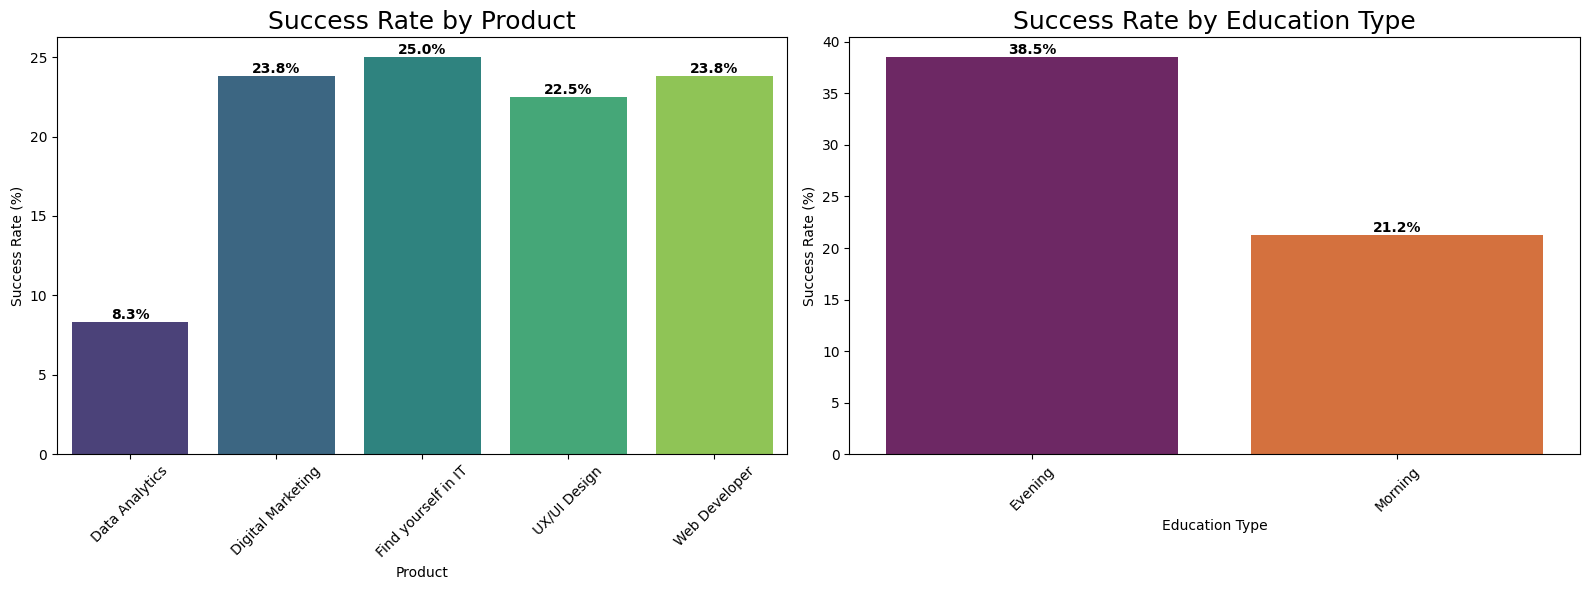

In [4]:
############# Group by Product to analyze total deals and success rate
product_stats = deals.groupby("Product", observed=True).agg(  # Explicitly setting observed=True
    Total_Deals=("Id", "count"),
    Successful_Deals=("Stage", lambda x: (x == "Payment Done").sum())
).reset_index()

# Filter out 'unknown' product types
product_stats = product_stats[product_stats["Product"] != "unknown"]

# Remove 'unknown' from category list
product_stats["Product"] = product_stats["Product"].astype(str)  # Convert to string to remove categorical issues

# Calculate success rate
product_stats["Success_Rate (%)"] = (product_stats["Successful_Deals"] / product_stats["Total_Deals"]) * 100

print(Back.YELLOW + "\nSummary table of Success Rate by Product"  + Style.RESET_ALL)
display(product_stats)

############## Group by Education_Type to analyze total deals and success rate
education_stats = deals.groupby("Education_Type", observed=True).agg(  # Explicitly setting observed=True
    Total_Deals=("Id", "count"),
    Successful_Deals=("Stage", lambda x: (x == "Payment Done").sum())
).reset_index()

# Filter out 'unknown' education types
education_stats = education_stats[education_stats["Education_Type"] != "unknown"]

# Remove 'unknown' from category list
education_stats["Education_Type"] = education_stats["Education_Type"].astype(str)  # Convert to string to remove categorical issues

# Calculate success rate
education_stats["Success_Rate (%)"] = (education_stats["Successful_Deals"] / education_stats["Total_Deals"]) * 100


print(Back.YELLOW + "\nSummary table of Success Rate by Education Type"  + Style.RESET_ALL)
display(education_stats)

############# Visualisations
# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot: Success rate by product
sns.barplot(x="Product", y="Success_Rate (%)", hue="Product", data=product_stats, palette="viridis", legend=False, ax=axes[0])

# Add labels above bars
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.1f}%", 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

axes[0].set_xlabel("Product")
axes[0].set_ylabel("Success Rate (%)")
axes[0].set_title("Success Rate by Product", fontsize=18)
axes[0].tick_params(axis="x", rotation=45)
#axes[0].grid(axis="y", linestyle="--", alpha=0.7)  # Add gridlines for better readability

# Bar plot: Success rate by education type
sns.barplot(x="Education_Type", y="Success_Rate (%)", hue="Education_Type", data=education_stats, palette="inferno", legend=False, ax=axes[1])

# Add labels above bars
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.1f}%", 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

axes[1].set_xlabel("Education Type")
axes[1].set_ylabel("Success Rate (%)")
axes[1].set_title("Success Rate by Education Type", fontsize=18)
axes[1].tick_params(axis="x", rotation=45)
#axes[1].grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

#### Популярность и успешность продуктов
**Анализ продуктов**
- **Общие тренды**
- **Digital Marketing** (23.81%) → наиболее **популярный** продукт по количеству сделок (1978), но успех ниже 25%. Это может говорить о высокой вовлечённости, но недостаточной конверсии.
- **UX/UI Design** (22.47%) → востребованный курс, но процент завершённых сделок невысокий. Можно протестировать маркетинговые улучшения.
- **Web Developer** (23.83%) → схожие показатели с маркетингом и UX/UI, но меньше сделок (575). Возможно, спрос ниже или аудитория требует персонализированного подхода. 
- **Data Analytics** (8.33%) → самый низкий процент успешных сделок. Возможно, связано с высокой конкуренцией или сложностью курса.
- **Find Yourself in IT** (25.00%) → малый объём данных (всего 4 сделки), но успех выше среднего. Для выводов надо больше информации которая к сожалению имеет очень много пропуски в CRM.

**Рекомендации**: 
- Улучшить доведение сделок до оплаты в Digital Marketing и UX/UI Design. 
- Усилить маркетинг для Web Developer и изучить уникальные потребности аудитории.
- Проверить факторы отказов для Data Analytics (цена, сложность, конкуренция).
- 
#### Популярность и успешность типов обучения
**Общие тренды**
- **Вечерние заняти**я (42.33%) → имеют значительно более высокий процент успешных сделок. Это говорит о том, что студенты предпочитают обучаться после работы или дневных дел, когда у них больше времени на обучение.
- **Утренние занятия** (22.87%) → хоть и имеют гораздо больше сделок (2895), но процент успешности почти в 2 раза ниже. Возможно, клиенты не успевают завершать оплату из-за занятости в первой половине дня.
- **Что может влиять на успешность?**
    - **Гибкость вечернего обучения** → людям удобнее совмещать работу и обучение.
    - **Проблемы утренних занятий** → не все успевают пройти процесс покупки или выделить время.
    - **Конверсия в оплату** → у вечерних студентов выше мотивация довести курс до конца, что повышает процент оплаты.

**Рекомендации**
- Оптимизировать утренние курсы → возможно, стоит предложить гибкие форматы (записи занятий, старт в удобное время).
- Активнее продвигать вечерние курсы → они имеют высокий потенциал успеха и привлекают мотивированную аудиторию.
- Провести A/B-тестирование → сравнить разницу в маркетинговых кампаниях для каждого типа обучения.

### Анализ доходности продуктов (Product) и типов обучения (Education_Type)

In [5]:
deals.Product.unique()

['unknown', 'Web Developer', 'Digital Marketing', 'UX/UI Design', 'Find yourself in IT', 'Data Analytics']
Categories (6, object): ['Data Analytics', 'Digital Marketing', 'Find yourself in IT', 'UX/UI Design', 'Web Developer', 'unknown']


Summary table of Total Revenue by Product


,Product,Total_Deals,Successful_Deals,Total_Revenue,Average_Revenue
1,Digital Marketing,1978,471,"2,463,200.91",939.66
2,UX/UI Design,1019,229,"1,032,559.55",944.86
3,Web Developer,575,137,"436,696.67",981.79
0,Data Analytics,36,3,"23,200.00","1,183.33"



Summary table of Total Revenue by Education Type


,Education_Type,Total_Deals,Successful_Deals,Total_Revenue,Average_Revenue
1,Morning,3157,670,"3,550,676.68","1,078.08"
0,Evening,444,171,"404,980.45",436.80


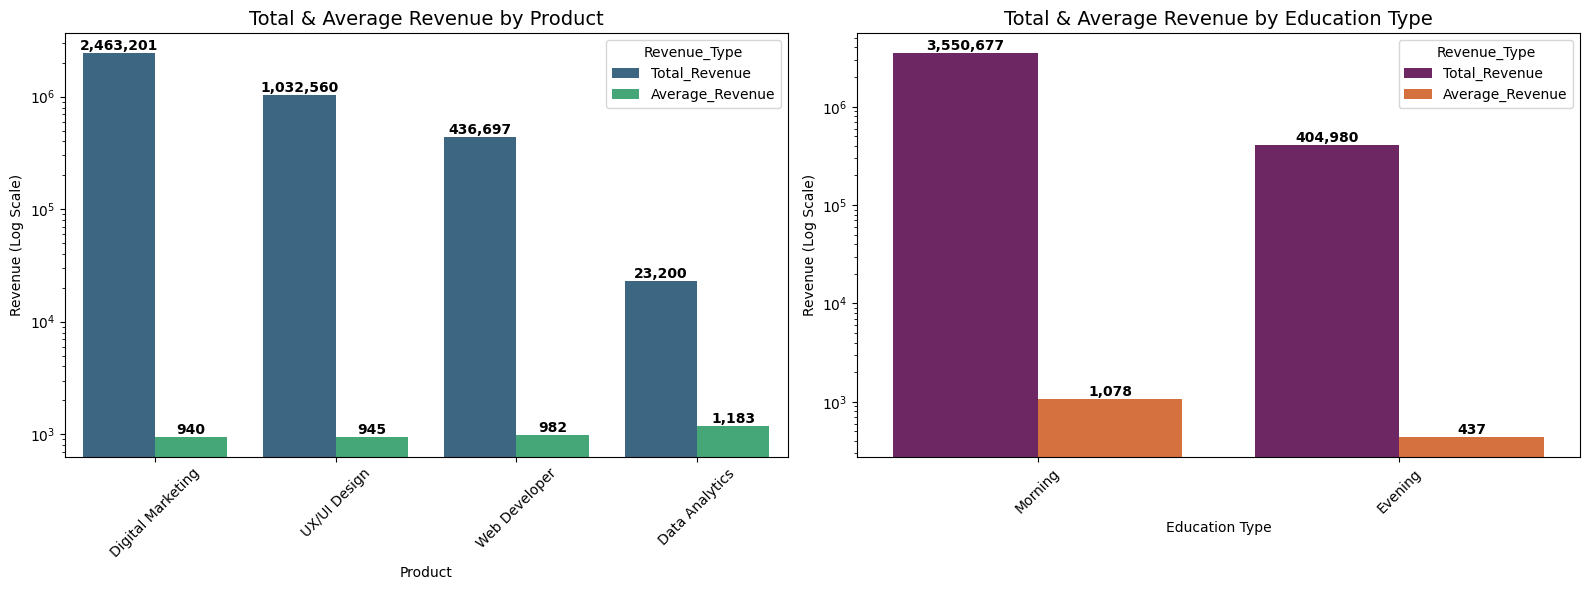

In [6]:
# Group by Product to analyze total revenue
product_revenue = deals[deals.Product!="Find yourself in IT"].groupby("Product", observed=True).agg(
    Total_Deals=("Id", "count"),
    Successful_Deals=("Stage", lambda x: (x == "Payment Done").sum()),
    Total_Revenue=("Paid", lambda x: x[deals["Stage"] == "Payment Done"].sum()),  
    Average_Revenue=("AOV", lambda x: x[deals["Stage"] == "Payment Done"].mean() if x[deals["Stage"] == "Payment Done"].sum() > 0 else 0)    
).reset_index()

# Filter out 'unknown' products
product_revenue = product_revenue[product_revenue["Product"] != "unknown"]

# Convert category column to string
product_revenue["Product"] = product_revenue["Product"].astype(str)
product_revenue["Average_Revenue"] = product_revenue["Average_Revenue"].fillna(0)

product_revenue = product_revenue.sort_values(by="Total_Revenue",ascending=False)

print(Back.YELLOW + "\nSummary table of Total Revenue by Product"  + Style.RESET_ALL)
display(product_revenue)

# Group by Education_Type to analyze total revenue
education_revenue = deals.groupby("Education_Type", observed=True).agg(
    Total_Deals=("Id", "count"),
    Successful_Deals=("Stage", lambda x: (x == "Payment Done").sum()),
    Total_Revenue=("Paid", lambda x: x[deals["Stage"] == "Payment Done"].sum()),  
    Average_Revenue=("AOV", lambda x: x[deals["Stage"] == "Payment Done"].mean() if x[deals["Stage"] == "Payment Done"].sum() > 0 else 0)
).reset_index()

# Filter out 'unknown' education types
education_revenue = education_revenue[education_revenue["Education_Type"] != "unknown"]
education_revenue = education_revenue.sort_values(by="Total_Revenue",ascending=False)

# Convert category column to string
education_revenue["Education_Type"] = education_revenue["Education_Type"].astype(str)

print(Back.YELLOW + "\nSummary table of Total Revenue by Education Type"  + Style.RESET_ALL)
display(education_revenue)

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot: Total & Average Revenue by Product (Log Scale)
product_melted = product_revenue.melt(id_vars=["Product"], value_vars=["Total_Revenue", "Average_Revenue"], 
                                      var_name="Revenue_Type", value_name="Revenue")

ax1 = sns.barplot(x="Product", y="Revenue", hue="Revenue_Type", data=product_melted, palette="viridis", ax=axes[0])
axes[0].set_yscale("log")  # Set log scale for y-axis

# Add labels above bars
for p in ax1.patches:
    if p.get_height() > 0:  # Avoid labels on zero values
        axes[0].annotate(f"{p.get_height():,.0f}", 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

axes[0].set_xlabel("Product")
axes[0].set_ylabel("Revenue (Log Scale)")
axes[0].set_title("Total & Average Revenue by Product", fontsize=14)
axes[0].tick_params(axis="x", rotation=45)
#axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# Bar plot: Total & Average Revenue by Education Type (Log Scale)
education_melted = education_revenue.melt(id_vars=["Education_Type"], value_vars=["Total_Revenue", "Average_Revenue"], 
                                          var_name="Revenue_Type", value_name="Revenue")

ax2 = sns.barplot(x="Education_Type", y="Revenue", hue="Revenue_Type", data=education_melted, palette="inferno", ax=axes[1])
axes[1].set_yscale("log")  # Set log scale for y-axis

# Add labels above bars
for p in ax2.patches:
    if p.get_height() > 0:  # Avoid labels on zero values
        axes[1].annotate(f"{p.get_height():,.0f}", 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha="center", va="bottom", fontsize=10, color="black", fontweight="bold")

axes[1].set_xlabel("Education Type")
axes[1].set_ylabel("Revenue (Log Scale)")
axes[1].set_title("Total & Average Revenue by Education Type", fontsize=14)
axes[1].tick_params(axis="x", rotation=45)
#axes[1].grid(axis="y", linestyle="--", alpha=0.7)

#ax1.legend(title="Revenue Type", loc="upper center", bbox_to_anchor=(0.45, 1.0), ncol=1, fontsize=10)
#ax2.legend(title="Revenue Type", loc="upper center", bbox_to_anchor=(0.4, 1.0), ncol=1, fontsize=10)


plt.tight_layout()
plt.show()


#### Доходность продуктов
**Общие тренды**: 
- **"Digital Marketing"** (2,463,200€) → лидер по суммарному доходу, но его средний чек (939.66€) немного ниже, чем у других популярных продуктов. Вероятно, это связано с большим объемом сделок при относительно невысокой стоимости курса.
- **"UX/UI Design"** (1,032,559€) → второй по доходности продукт, но его средний чек (944.86€) чуть выше, что говорит о потенциальной устойчивости курса.
- **"Web Developer"** (436,696.67€) → хорошая доходность при среднем чеке (981.79€), но объем сделок заметно ниже.
- **"Data Analytics"** (23,200€) → крайне низкая доходность при среднем чеке (1,183€), что может указывать на проблемы с продажами или слабый спрос.

**Что можно улучшить?**
- Пересмотреть маркетинг **Data Analytics** → изучить причины низкой конверсии и протестировать новые подходы.
- Оптимизировать **Web Developer** → возможно, стоит сделать упрощенные тарифы или рассмотреть больше рекламных инвестиций.
- Поддерживать **Digital Marketing** и **UX/UI** → эти продукты успешно приносят доход, но могут быть дополнительные возможности роста через upselling (например базовый курс - upsell на PRO-версию с доступом к закрытым материалам, или групповые занятия → upsell на индивидуальные уроки с наставником) или другие, продвинутые версии курсов.

**Вывод**: 
- **Digital Marketing** и **UX/UI Design** — самые прибыльные продукты с высоким объемом успешных сделок. 
- **Web Developer** тоже приносит доход, но требует дополнительного маркетинга. 
- **Data Analytics** — требуeт внимания к стратегии продаж и спросу.

#### Доходность типов обучения
**Общие тренды**: 
- **Morning** (3,529,276€) → лидер по общему доходу, так как имеет наибольшее количество сделок (3157). Средний доход на успешную сделку — 1,077.92€, что выше вечерних курсов. 
- **Evening** (426,380€) → гораздо меньший доход, но процент успешных сделок выше. Средний чек ниже (444.85€), возможно, вечерние программы привлекательны из-за более доступных цен.

**Выводы**
- **Утреннее обучение** приносит больше денег, но требует анализа причин отказов (как увеличить успешность сделок). 
- **Вечерние курсы** имеют ниже доход, но могут быть перспективны для роста, если предложить дополнительные услуги или повысить цены.

**Рекомендации**
- **Проверить маркетинг утреннего сегмента** → изучить аудиторию, готовы ли они платить больше, почему сделки завершаются не всегда. 
- **Оптимизировать вечерние курсы** → повысить цены или расширить предложение, сохраняя удобный формат для студентов.